In [26]:
import numpy as np
import pandas as pd
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import joblib

In [27]:
df=pd.read_csv(r"C:\Users\User\Downloads\Housing.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [28]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
print('\nCategorical columns:', cat_cols)


Categorical columns: ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


In [29]:
df_encoded = pd.get_dummies(df, drop_first=True)
print('\nShape after encoding:', df_encoded.shape)
display(df_encoded.head())


Shape after encoding: (545, 14)


,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False


In [30]:
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Training samples:', X_train.shape[0], 'Test samples:', X_test.shape[0])
model = LinearRegression()
model.fit(X_train, y_train)
print('\nLinear Regression model trained')


Training samples: 436 Test samples: 109

Linear Regression model trained


In [31]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Model performance on test set:')
print(f"MAE  : {mae:,.2f}")
print(f"RMSE : {rmse:,.2f}")
print(f"R²   : {r2:.4f}")

Model performance on test set:
MAE  : 970,043.40
RMSE : 1,324,506.96
R²   : 0.6529


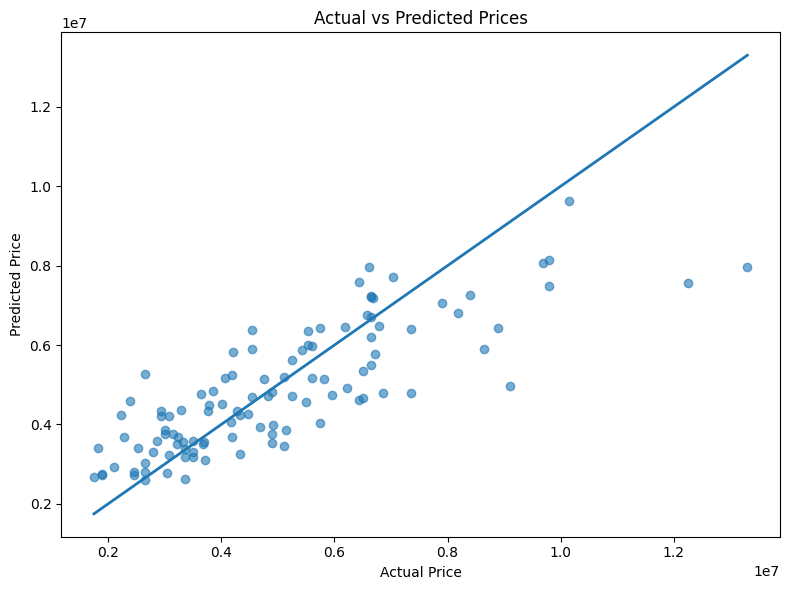

In [32]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6)
# 45-degree reference line
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], linewidth=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.tight_layout()
plt.show()

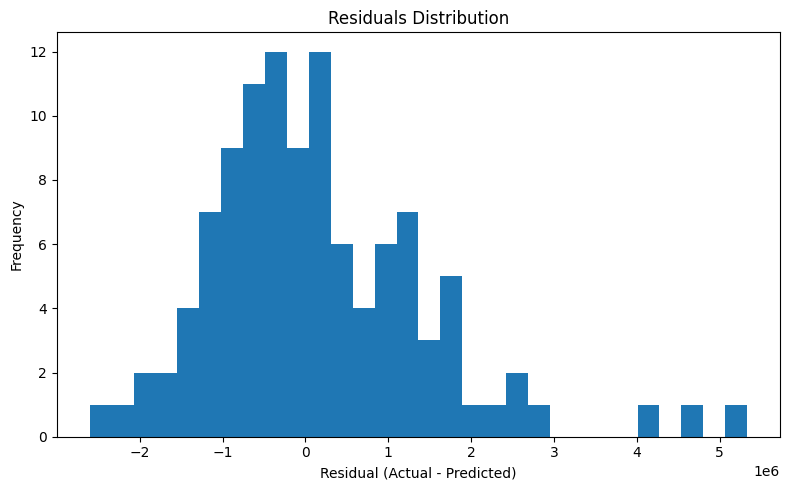

In [33]:
residuals = y_test - y_pred
plt.figure(figsize=(8,5))
plt.hist(residuals, bins=30)
plt.xlabel('Residual (Actual - Predicted)')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.tight_layout()
plt.show()

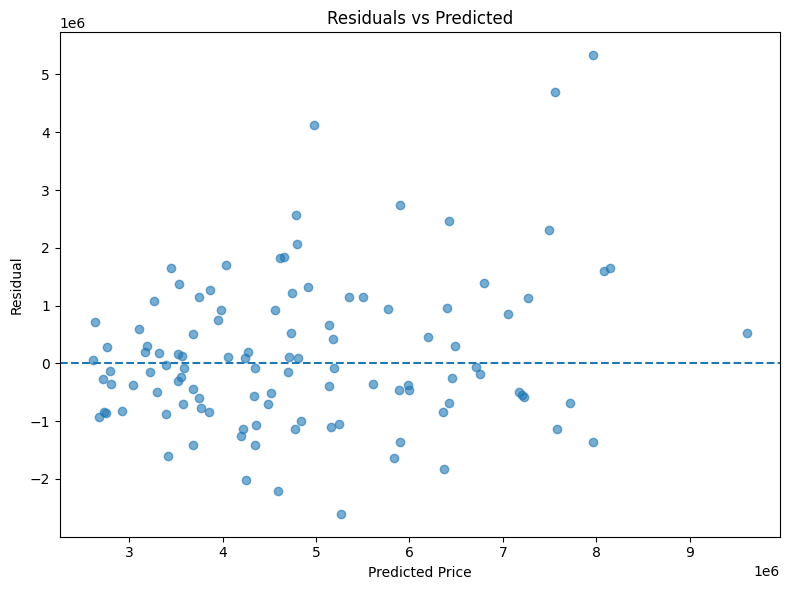

In [34]:
plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residual')
plt.title('Residuals vs Predicted')
plt.tight_layout()
plt.show()

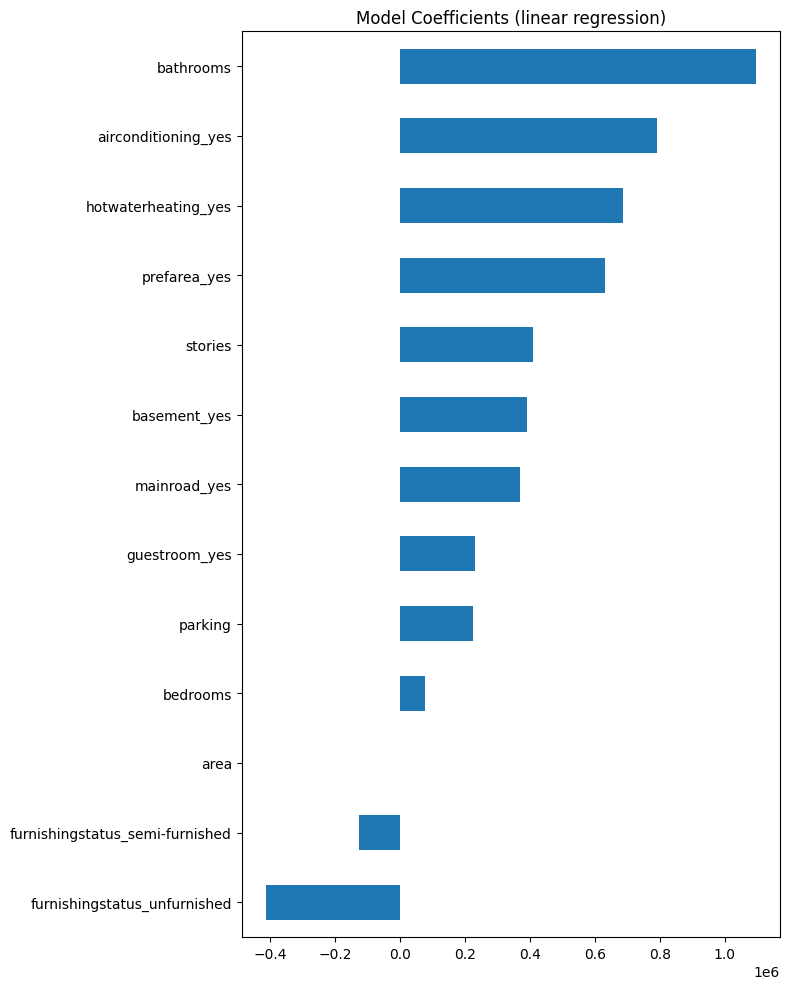

In [35]:
coeffs = pd.Series(model.coef_, index=X.columns).sort_values()
plt.figure(figsize=(8,10))
coeffs.plot(kind='barh')
plt.title('Model Coefficients (linear regression)')
plt.tight_layout()
plt.show()

In [36]:
joblib.dump(model, 'house_price_model.pkl')
joblib.dump(X.columns.tolist(), 'model_columns.pkl')
print("Saved 'house_price_model.pkl' and 'model_columns.pkl' in the current working directory.")


Saved 'house_price_model.pkl' and 'model_columns.pkl' in the current working directory.


In [37]:
sample_house = {
    'area': 4000,
    'bedrooms': 3,
    'bathrooms': 2,
    'stories': 2,
    'mainroad': 'yes',
    'guestroom': 'no',
    'basement': 'no',
    'hotwaterheating': 'no',
    'airconditioning': 'yes',
    'parking': 1,
    'prefarea': 'no',
    'furnishingstatus': 'semi-furnished'
}

# Convert to DataFrame and encode to match training columns
df_input = pd.DataFrame([sample_house])
df_input_encoded = pd.get_dummies(df_input)
# Align with training columns
df_input_encoded = df_input_encoded.reindex(columns=X.columns, fill_value=0)

predicted_price = model.predict(df_input_encoded)[0]


print(f"Predicted price for sample houseing: {predicted_price:,.2f}")


Predicted price for sample houseing: 5,695,393.22
